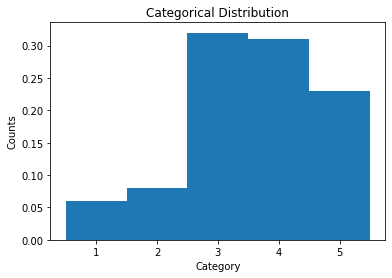

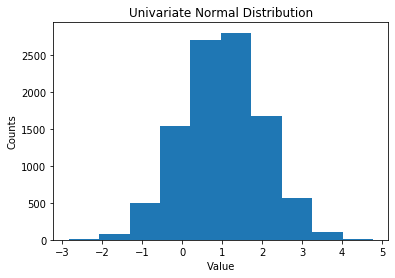

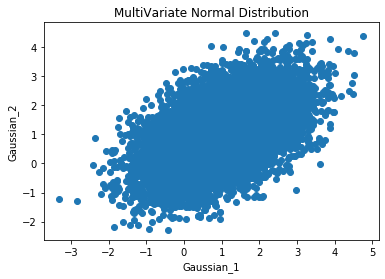

0.1837


In [8]:
import numpy as np
import math
class ProbabilityModel:

    # Returns a single sample (independent of values returned on previous calls).
    # The returned value is an element of the model's sample space.
    def sample(self):
        pass


# The sample space of this probability model is the set of real numbers, and
# the probability measure is defined by the density function 
# p(x) = 1/(sigma * (2*pi)^(1/2)) * exp(-(x-mu)^2/2*sigma^2)
class UnivariateNormal(ProbabilityModel):
    
    # Initializes a univariate normal probability model object
    # parameterized by mu and (a positive) sigma
    def __init__(self,mu,sigma):
        self.mu = mu
        self.sigma = sigma

    def sample(self):
        u = np.random.uniform(0,1)
        v = np.random.uniform(0,1)
        x = math.sqrt(-2*math.log(u))*math.cos(math.pi*2*v)
        rev = self.mu+abs(self.sigma)*x
        return rev
    
# The sample space of this probability model is the set of D dimensional real
# column vectors (modeled as numpy.array of size D x 1), and the probability 
# measure is defined by the density function 
# p(x) = 1/(det(Sigma)^(1/2) * (2*pi)^(D/2)) * exp( -(1/2) * (x-mu)^T * Sigma^-1 * (x-mu) )
class MultiVariateNormal(ProbabilityModel):
    
    # Initializes a multivariate normal probability model object 
    # parameterized by Mu (numpy.array of size D x 1) expectation vector 
    # and symmetric positive definite covariance Sigma (numpy.array of size D x D)
    def __init__(self,Mu,Sigma):
        self.Mu = Mu
        self.Sigma = Sigma

    def sample(self):
        a = np.linalg.cholesky(self.Sigma)
        z = [ ]
        num = len(self.Mu)
        for i in range(0,num):
            z.append(UnivariateNormal(0, 1).sample())
        x = self.Mu + np.dot(a,z)
        return x 
    
# The sample space of this probability model is the finite discrete set {0..k-1}, and 
# the probability measure is defined by the atomic probabilities 
# P(i) = ap[i]
class Categorical(ProbabilityModel):
    
    # Initializes a categorical (a.k.a. multinom, multinoulli, finite discrete) 
    # probability model object with distribution parameterized by the atomic probabilities vector
    # ap (numpy.array of size k).
    def __init__(self,ap):
        self.ap = ap

    def sample(self):
        u = np.random.uniform(0,1)
        x = np.array(self.ap)
        temp = np.cumsum(x) <= u
        res = np.sum(temp)
        return res


# The sample space of this probability model is the union of the sample spaces of 
# the underlying probability models, and the probability measure is defined by 
# the atomic probability vector and the densities of the supplied probability models
# p(x) = sum ad[i] p_i(x)
class MixtureModel(ProbabilityModel):
    
    # Initializes a mixture-model object parameterized by the
    # atomic probabilities vector ap (numpy.array of size k) and by the tuple of 
    # probability models pm
    def __init__(self,ap,pm):
        self.obj = Categorical(ap)
        self.pm = pm

    def sample(self):
        x = self.obj.sample()
        return self.pm[x].sample()

import matplotlib.pyplot as plt
%matplotlib inline
 # 1.
given = [0.1, 0.1, 0.3, 0.3, 0.2]
C = []
for i in range(0,100):
    C.append(Categorical(given).sample())
plt.hist(C,bins = [0,1,2,3,4,5],density = True, align = 'right')
plt.title("Categorical Distribution")
plt.xlabel("Category")
plt.ylabel("Counts")
plt.show()
        
#2.
mu = 1
sigma = 1
normal = []
for i in range(0,10000):
    normal.append(UnivariateNormal(mu,sigma).sample())
plt.hist(normal)
plt.title("Univariate Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Counts")
plt.show()

#3
Mu=[1,1]
Sigma=[[1,0.5],[0.5,1]]
Gaussian_1=[]
Gaussian_2=[]
for i in range(0,10000):
    Gaussian = MultiVariateNormal(Mu,Sigma).sample()
    Gaussian_1.append(Gaussian[0])
    Gaussian_2.append(Gaussian[1])
plt.scatter(Gaussian_1,Gaussian_2)
plt.title("MultiVariate Normal Distribution")
plt.xlabel("Gaussian_1")
plt.ylabel("Gaussian_2")
plt.show()

#4
import numpy as np
Sigma = np.array([[1,0],[0,1]])
Mu_1 = np.array([1,1])
Mu_2 = np.array([-1,1])
Mu_3 = np.array([1,-1])
Mu_4 = np.array([-1,-1])
weight = [.25,.25,.25,.25]
model = [MultiVariateNormal(Mu_1,Sigma),MultiVariateNormal(Mu_2,Sigma),MultiVariateNormal(Mu_3,Sigma),MultiVariateNormal(Mu_4,Sigma)]
count = 0
num = 10000
centre = [0.1,0.2]
for i in range(0,num):
    res = MixtureModel(weight,model).sample()
    func = (res[0]-centre[0])**2 + (res[1]-centre[1])**2
    if func < 1:
        count = count + 1
print (count / num)
